## 3. 새로운 트레이닝 데이터로 학습시킨 모델을
## evaluation data로 테스트한 결과

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
class NN:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        numpy.random.seed(2)
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        self.lr = learningrate    
        pass
    
    def activation_function(self,x):
        return 1/(1+numpy.exp(-x))
    
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))       
        pass
    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
training_data_file = pd.read_csv('/content/drive/MyDrive/colab/MNIST/mnist_traindata.csv')
training_data_list = training_data_file.to_numpy()
test_data_file = pd.read_csv('/content/drive/MyDrive/colab/MNIST/mnist_evaldata.csv')
test_data_list = test_data_file.to_numpy()

In [11]:
def em_ANN():
  hidden_nodes = int(input("input hidden nodes"))
  learning_rate = float(input("input learning rate"))
  input_nodes = 784
  output_nodes = 10
  epochs = int(input("input epochs"))
  n = NN(input_nodes,hidden_nodes,output_nodes, learning_rate)
  
  pf_list = []
  for e in range(epochs):
    for record in training_data_list:
        inputs = (record[1:] / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[record[0]] = 0.99
        n.train(inputs, targets)
        
    scorecard = []
    for record in test_data_list:
      correct_label = record[0]
      inputs = (record[1:] / 255.0 * 0.99) + 0.01
      outputs = n.query(inputs)
      label = numpy.argmax(outputs)
      if (label == correct_label):
        scorecard.append(1)
      else:
        scorecard.append(0)
        
    scorecard = numpy.asarray(scorecard)
    performance =  scorecard.sum() / scorecard.size
    pf_list.append(performance)
    print('.')

  with open(f"wih_{learning_rate}_{hidden_nodes}","wb")as file:
    pickle.dump(n.wih,file)
  with open(f"who_{learning_rate}_{hidden_nodes}","wb")as file:
    pickle.dump(n.who,file)  
  plt.plot(pf_list)
  plt.xlabel("epochs")
  plt.ylabel("performance")
  plt.title(f"performance by learningrate({learning_rate}) & the number of hidden nodes({hidden_nodes})")
  plt.show()
  print("maximum performance:",max(pf_list),"the epoch:",pf_list.index(max(pf_list)))

input hidden nodes200
input learning rate0.01
input epochs30
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


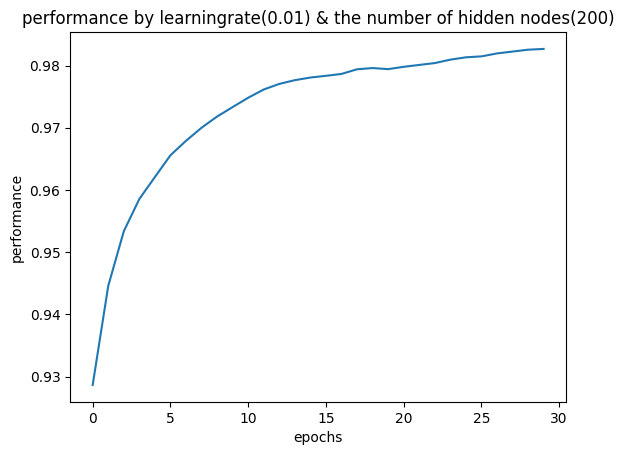

maximum performance: 0.9826745668641717 the epoch: 29


In [12]:
em_ANN()

## 최종적으로 98.267%의 정확도를 보임